In [17]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
# Replace 'your_file.tif' with the path to your 4D TIFF file
file_path = '/Users/apple/Desktop/Akamatsu_Lab/Lap_track/self/files/Channel1_complete.tif'

# Load the TIFF file using skimage
c1_raw = io.imread(file_path)

In [3]:
# Replace 'your_file.tif' with the path to your 4D TIFF file
file_path = '/Users/apple/Desktop/Akamatsu_Lab/Lap_track/self/files/Channel2_complete.tif'

# Load the TIFF file using skimage
c2_raw = io.imread(file_path)

In [4]:
# Replace 'your_file.tif' with the path to your 4D TIFF file
file_path = '/Users/apple/Desktop/Akamatsu_Lab/Lap_track/self/files/Channel3_complete.tif'

# Load the TIFF file using skimage
c3_raw = io.imread(file_path)

In [5]:
c1_raw.shape

(130, 75, 258, 275)

In [6]:
c1_raw_t0 = c1_raw[0]

In [14]:
# Initialize an empty list to store the sum of pixel values for each z value
sum_of_pixels = []

# Iterate over the z-axis of the 3D numpy array
for z in range(c1_raw_t0.shape[0]):
    # Calculate the sum of pixel values for the current z value
    sum_of_pixels_z = np.sum(c1_raw_t0[z,:, :])
    # Append the sum to the list
    sum_of_pixels.append(sum_of_pixels_z)

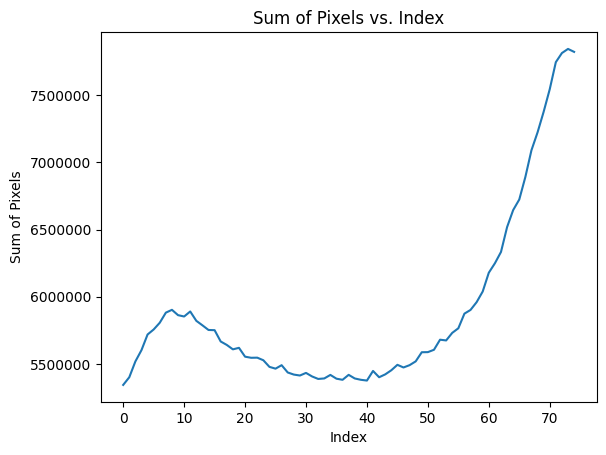

In [24]:
# Generate x-axis values (index values from sum_of_pixels)
x_values = range(len(sum_of_pixels))

# Plot the line chart
plt.plot(x_values, sum_of_pixels)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Sum of Pixels')
plt.title('Sum of Pixels vs. Index')

from matplotlib.ticker import FuncFormatter
# Format y-axis ticks to display whole values
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))

# Show the plot
plt.show()

In [19]:
c1_raw_t100 = c1_raw[100]

In [20]:
# Initialize an empty list to store the sum of pixel values for each z value
sum_of_pixels = []

# Iterate over the z-axis of the 3D numpy array
for z in range(c1_raw_t100.shape[0]):
    # Calculate the sum of pixel values for the current z value
    sum_of_pixels_z = np.sum(c1_raw_t100[z,:, :])
    # Append the sum to the list
    sum_of_pixels.append(sum_of_pixels_z)

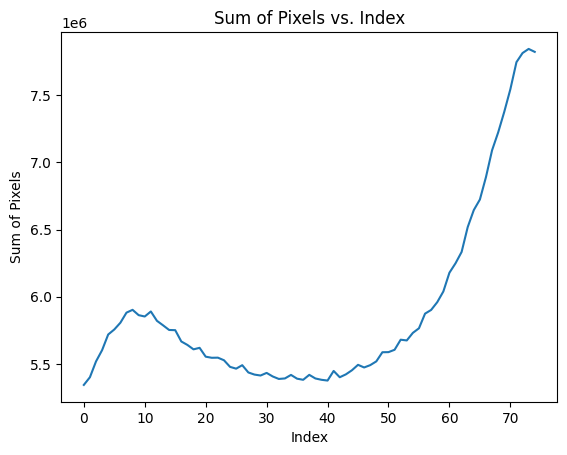

In [21]:
# Generate x-axis values (index values from sum_of_pixels)
x_values = range(len(sum_of_pixels))

# Plot the line chart
plt.plot(x_values, sum_of_pixels)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Sum of Pixels')
plt.title('Sum of Pixels vs. Index')

# Show the plot
plt.show()

In [50]:
def plot_z_sum(file_path):
    # Load the TIFF file using skimage
    c1_raw = io.imread(file_path)
    lower_frame = (c1_raw.shape[0] * 0.25) // 1
    center_frame = (c1_raw.shape[0] * 0.5) // 1
    upper_frame = (c1_raw.shape[0] * 0.75) // 1
    times_to_plot = []
    times_to_plot.append(0)
    times_to_plot.append(int(lower_frame))
    times_to_plot.append(int(center_frame))
    times_to_plot.append(int(upper_frame))
    times_to_plot.append(c1_raw.shape[0]-1)
    all_frame_sum = []
    # Generate x-axis values (index values from sum_of_pixels)
    x_values = np.arange(c1_raw.shape[1])
            
    for frame in times_to_plot:
        c1_raw_frame = c1_raw[frame]
        # Initialize an empty list to store the sum of pixel values for each z value
        sum_of_pixels = []
        # Iterate over the z-axis of the 3D numpy array
        for z in range(c1_raw_frame.shape[0]):
            # Calculate the sum of pixel values for the current z value
            sum_of_pixels_z = np.sum(c1_raw_frame[z,:, :])
            # Append the sum to the list
            sum_of_pixels.append(sum_of_pixels_z)
        all_frame_sum.append(sum_of_pixels)
    
    for i in range(len(all_frame_sum)):
        colors = ['red', 'green', 'blue', 'orange', 'pink']
        plt.plot(x_values, all_frame_sum[i], color = colors[i], label = f'frame {times_to_plot[i]}')
        # Format y-axis ticks to display whole values
    
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
    plt.legend()
    plt.xlabel('Z slice')
    plt.ylabel('Pixels sum')
    plt.title('Pixel sum over Z slices')
    

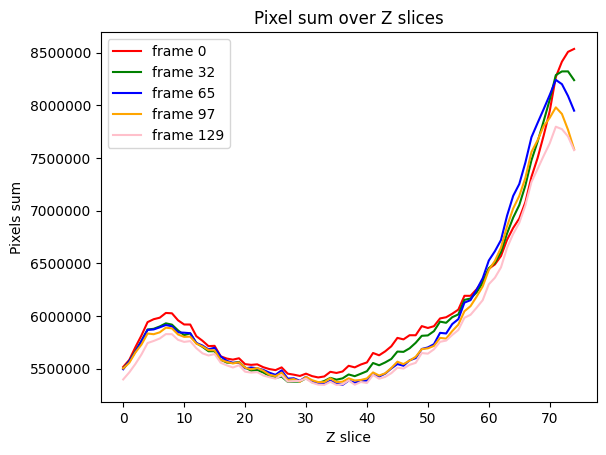

In [51]:
plot_z_sum('/Users/apple/Desktop/Akamatsu_Lab/Lap_track/self/files/Channel1_complete.tif')